# Comparing Hold-out Vs K-Fold Cross Validation

## Introduction


Data splitting methodology is critical for the correct measurement of the performance of a machine learning prediction model. Hold-out testing is a common approach where the dataset is split into two sets, a training set and a testing set. However, when the dataset is small, the hold-out method can produce highly variable estimates of the model's performance. K-fold cross-validation is a more robust method that can provide more stable and better estimates of the model's performance, especially with smaller datasets.

The aim of this experiment is to compare the stability of performance of prediction models created using hold-out and k-fold cross-validation methods using three data sets (Wine, Seeds and Ionosphere) from the UCI repository, and determine which method produces more accurate and stable estimates of the model's performance. The experiment will also evaluate these data-splitting approaches using four (4) different machine learning models, K-NN, decision trees, Naive Bayes and SVM to make our results more bias-proof. The ultimate goal of this experiment is to determine which of the two data-splitting techniques considered is more optimal and reliable data splitting approach for smaller datasets.



## Approach

### Datasets
##### 1. Wine Dataset
The wine dataset from the UCI repository is a popular dataset in machine learning. It consists of 178 samples of wine, with 13 features each, including the chemical composition of the wine, such as alcohol content, acidity, and color intensity. The target variable is a categorical variable that represents the class of the wine, with three possible values: class 1, class 2, and class 3. Each class corresponds to a different cultivar of wine.
##### 2. Seeds Dataset
The Seeds dataset is also available on the UCI ML Repository and contains measurements of geometrical properties of wheat kernels belonging to three different varieties: Kama, Rosa and Canadian. These properties include area, perimeter, compactness, length of kernel, width of kernel, asymmetry coefficient, and length of kernel groove. The dataset consists of 210 instances, with 70 instances per class, and each instance has seven real-valued input attributes. 
##### 3. Ionosphere Dataset
The Ionosphere dataset is another on the UCI Machine Learning Repository and consists of radar data collected by a system in Goose Bay, Labrador. The goal of the dataset is to predict whether a signal will pass through the ionosphere or be reflected back. The dataset consists of 351 instances, each with 34 attributes. The first 33 attributes represent the amplitude of the signal at different radar frequencies, while the last attribute is a class label indicating whether the signal passed through the ionosphere or was reflected back.



### Preprocessing
Before conducting the experiment, we need to preprocess the data. We will first load the dataset into a pandas dataframe and perform the following data preparation steps:

* Analyse the data for missing or null values as well as outliers.
* Split the data into features (X) and target (y) variables.
* Standardize the features using scikit-learn's StandardScaler or MinMaxScaler.


### Experimental Steps
1. Select a dataset, create 20 subsets of the dataset, increasing the size by 5% for each so as to obtain a distribution of accuracy.
2. Hold-out Validation: Split the subset of the data into a training set (75% of the data) and a testing set (25% of the data) using the hold-out method and train a model using the four selected algorithms( K-NN, decision trees, Naive Bayes and SVM) on the training set and evaluate and record its accuracy on the testing set.
3. K-fold cross-validation: Using 5 k-folds, and compute and record the mean of the accuracy scores for the four classifiers as well.
4. Repeat Steps 1-3, but with all subsets of the data in increasing order i.e. 5%, 10%, 15%, etc.
5. Repeat steps 1-4 with all three datasets.
6. Analyse the results. 

### Evaluation Metrics
The accuracy metric will be utilized for the evaluation of the performance of each splitting technique. We will also calculate the standard deviation and coefficient variability of the accuracy scores obtained from each data-splitting method per model, as to determine the reliability of the predictions. 

### Analysis
We will visualize the distribution results of the hold-out and k-fold cross-validation across the increasing data amounts. We will also use a box plot to visualize the variance of the accuracy scores for each method and model and draw conclusions from this analyses.


### Assumptions
* The datasets used in the experiment are representative of real-world data and are suitable for the evaluation of the data splitting methods and machine learning algorithms.
* The preprocessing steps, such as handling missing values and standardizing the features, are appropriate for all three datasets and do not introduce any bias into the results.
* The four selected machine learning algorithms are appropriate for the datasets and can produce reliable and accurate predictions.

### Limitations:
* The experiment only considers the accuracy metric for evaluating the performance of the models and does not consider other important metrics such as precision, recall, or F1 score.
* The experiment only considers a limited number of machine learning algorithms, which may not be the best choice for all datasets.
* The experiment only uses three datasets from the UCI repository, which may not be representative of all types of data.
* The experiment uses the datasets focused on classification problems.

###  Delimitations:
* The experiment focuses only on comparing the stability of the hold-out and k-fold cross-validation with default parameters without hyperparameter tuning.
* The experiment uses the datasets focused on classification problems to reduce the scope of the experiment.

## Experiment 

### General Module Installation and Imports

In [37]:
## Install required modules
import sys
!{sys.executable} -m pip install matplotlib seaborn scipy sklearn pandas numpy

# Import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from copy import deepcopy
from pprint import PrettyPrinter



[notice] A new release of pip available: 22.3.1 -> 23.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


### Part I (Wine Dataset)

####  Preliminary Data Handling and Analysis

In [57]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

# Load the dataset
wine_data = pd.read_csv(url, names=["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium",
           "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins",
           "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"] )

# View the updated dataframe
print(wine_data.head())

# Check for missing values
print("Missing records: ", wine_data.isnull().sum())

# Check for duplicate records
print("Duplicate records: ", wine_data.duplicated().any())
print("\n")

print("The total number of null records in the dataset is:")
print(wine_data.isna().sum())
print("\n")



   Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05  

#### Preparatory Data Analysis

#### Feature Analysis Visualization
A histogram plots with normal distribution curves are useful to visualize the distribution of each feature in the dataset. It aids the identification of potential outliers or skewness in the data and more importantly it informs our decision whether to normalize or not. 

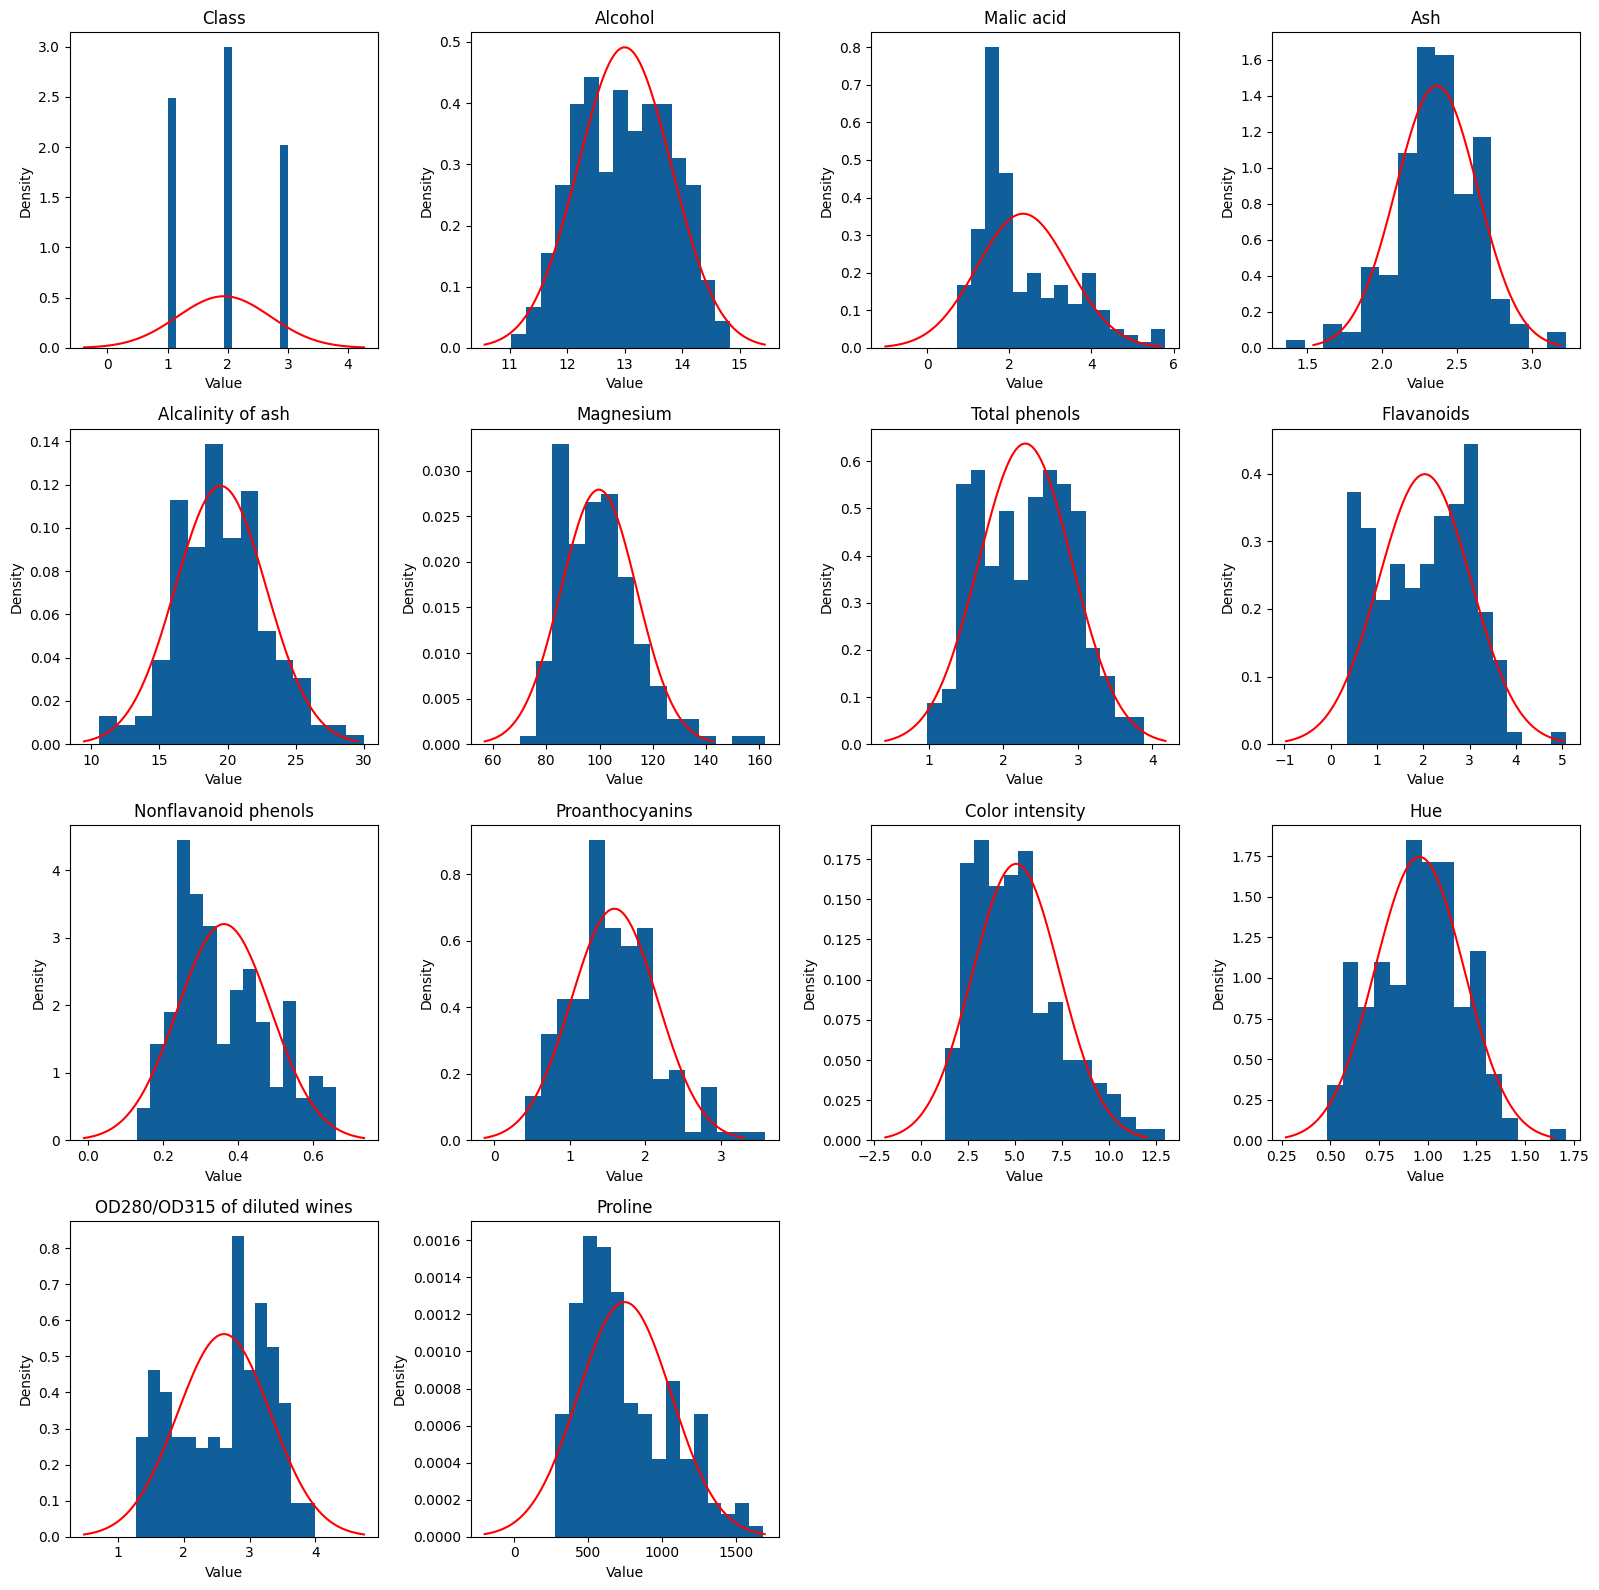

In [58]:
# 4x4 grid of subplots 
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

# Loop through each column in the dataset
for i, column in enumerate(wine_data.columns):
    
    # Get the current axis object for this subplot
    ax = axes[i//4, i%4]

    # Histogram of the current column's value
    # Set the density argument to True to normalize the histogram
    ax.hist(wine_data[column], bins=15, color='#115f9a', density=True) 
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    
    # Calculate the mean and standard deviation of the current column's values
    mu, sigma = wine_data[column].mean(), wine_data[column].std()
    
    # Generate 100 equally spaced values between 3 standard deviations below and above the mean
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    
    # Plot the normal distribution curve using the calculated mean and standard deviation
    ax.plot(x, stats.norm.pdf(x, mu, sigma), color='red')
    
# Remove the excess plots
for j in range(14, 16):
    axes.flatten()[j].axis('off')    

# Set the plot layout
plt.tight_layout()
plt.show()


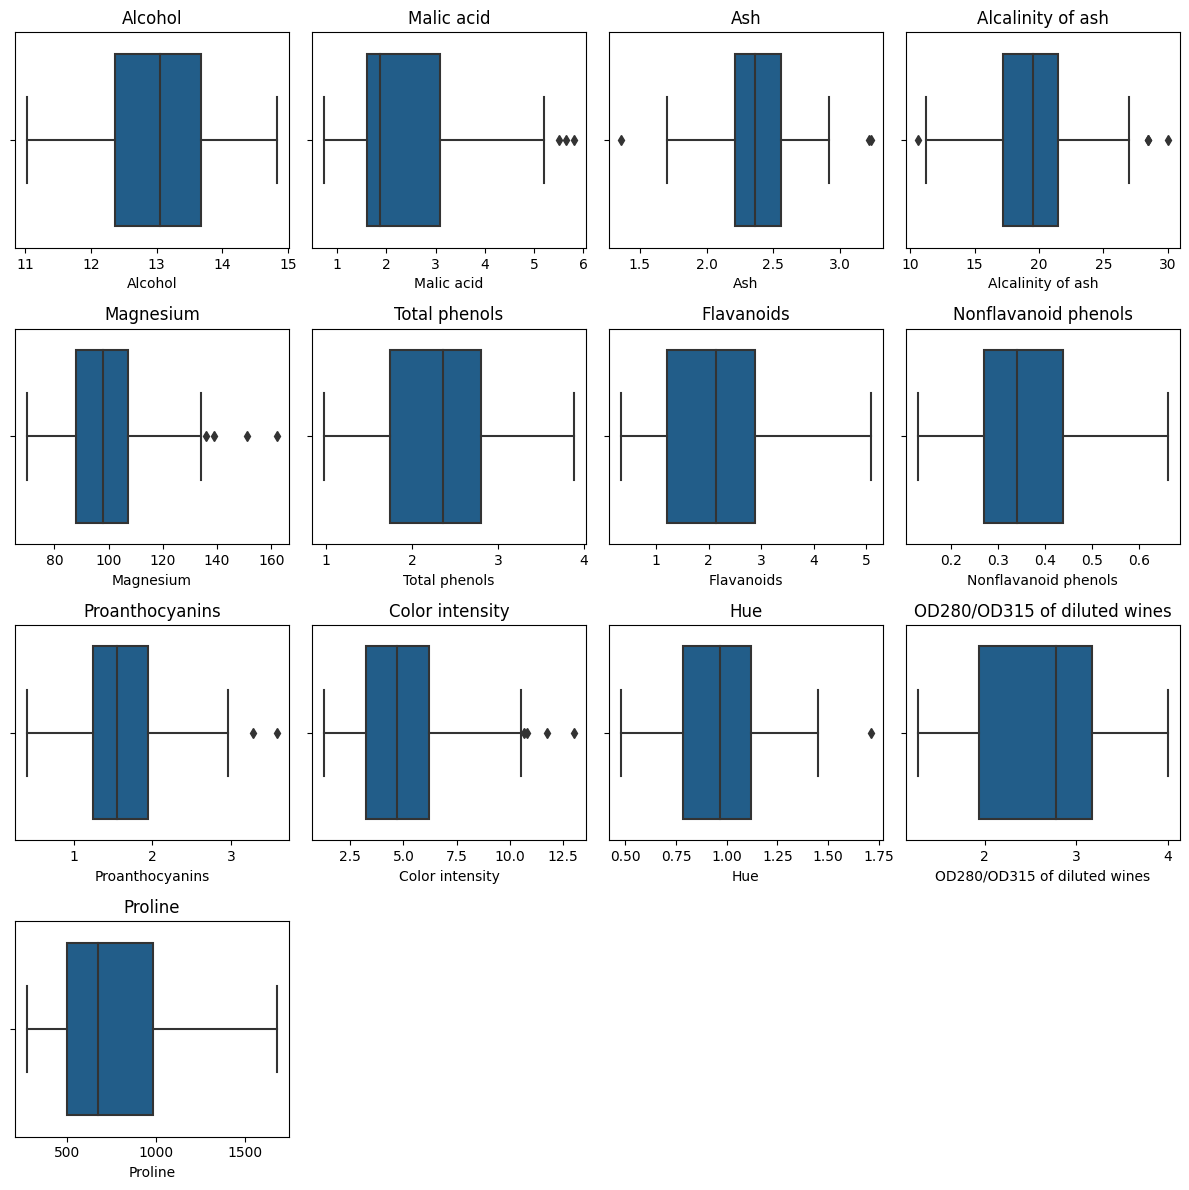

In [59]:
# 4x4 grid of subplots
fig, axs = plt.subplots(4, 4, figsize=(12, 12))

#Loop through each feature and plot a boxplot in a subplot
for i, feature in enumerate(wine_data.columns[1:]):
    row = i // 4
    col = i % 4
    sns.boxplot(x=feature, data=wine_data, ax=axs[row, col], color='#115f9a')
    axs[row, col].set_title(feature)

#Remove unused subplots
for j in range(i+1, 4*4):
    axs.flatten()[j].axis('off')

plt.tight_layout()
plt.show()


In [6]:
# Loop through the independent features
for feature in wine_data.columns[1:]:
    # Get the minimum and maximum values for the current feature
    min_val = wine_data[feature].min()
    max_val = wine_data[feature].max()
    # Calculate the range for the current feature
    feature_range = max_val - min_val
    # Print the minimum, maximum, and range for the current feature
    print(f"{feature}: min = {min_val}, max = {max_val}, range = {feature_range}")

Alcohol: min = 11.03, max = 14.83, range = 3.8000000000000007
Malic acid: min = 0.74, max = 5.8, range = 5.06
Ash: min = 1.36, max = 3.23, range = 1.8699999999999999
Alcalinity of ash: min = 10.6, max = 30.0, range = 19.4
Magnesium: min = 70, max = 162, range = 92
Total phenols: min = 0.98, max = 3.88, range = 2.9
Flavanoids: min = 0.34, max = 5.08, range = 4.74
Nonflavanoid phenols: min = 0.13, max = 0.66, range = 0.53
Proanthocyanins: min = 0.41, max = 3.58, range = 3.17
Color intensity: min = 1.28, max = 13.0, range = 11.72
Hue: min = 0.48, max = 1.71, range = 1.23
OD280/OD315 of diluted wines: min = 1.27, max = 4.0, range = 2.73
Proline: min = 278, max = 1680, range = 1402


#### Data Sampling
To enable our data distribution, we create 20 sample sizes of 5% increasing data of our data to analyse the effect of increasing data volume on accuracy

In [60]:
# Data subsets object (keys are the sample size percentages 5, 10, 15..)

wine_data_subsets:dict[int, pd.DataFrame] = {}

# Save the 10 subsets of the shuffled dataset to a list
for i in range(10, 105, 5):

    # Use the sample method to select increments of 10% of the overall data
    wine_data_shuff = wine_data.sample(frac=i/100, random_state=15).reset_index(drop=True)

    # save the samples to a data frame by percentage 
    wine_data_subsets[int(i)] = pd.DataFrame(wine_data_shuff) 


#### Hold-Out Validation and K-Fold Cross Validation (KNN, GaussianNB, DTC, SVC)
The following code is using four different machine learning algorithms to create models for comparing the two different methods of splitting the data into training and testing sets to see which method gives more stable results.
* First we use hold-out validation, where the dataset is randomly split into a training set (75%) and a testing set (25%). The machine learning algorithm is trained on the training set, and then tested on the testing set. This process is repeated for each iteration.
* Then we k-fold cross-validation,  in this method, the dataset is split into 5 k-folds, and each fold is used as the testing set while the other folds are used as the training set. This process is repeated k=5 times, so that each part is used as the testing set once. Again, this process is repeated several times to get an average accuracy score.
* We then create a dictionary that maps the names of the machine learning algorithms to the algorithms themselves and then two more dictionaries to store the accuracy scores for the hold-out validation and k-fold cross-validation methods.
* We then iterate over 20 different subsets of the wine dataset, increasing the size of the subsets by 5% each time. For each subset, it separates the dataset into the target class (quality) and the features (such as alcohol content). It then uses each of the four machine learning algorithms to make predictions about the quality of the wine using both hold-out validation and k-fold cross-validation. It stores the accuracy scores for each method in the respective dictionaries.
* Finally, the code prints out the accuracy scores for each of the four machine learning algorithms using both hold-out validation and k-fold cross-validation. This will allow us to compare the accuracy of the algorithms using both methods and determine which method is more accurate.

In [61]:

CLF_MAP = {
    'knn': KNeighborsClassifier(n_neighbors=3),
    'naive': GaussianNB(),
    'dt': DecisionTreeClassifier(),
    'svc': SVC()
}
CLF_NAME_MAP = {
    'knn': 'K-Nearest Neighbors',
    'naive': 'Gaussian Naive Bayes',
    'dt': 'Decision Tree',
    'svc': 'Support Vector'
}

wine_h_out_scores_map = {
    'knn': [],
    'naive': [],
    'dt': [],
    'svc':[]
}

wine_k_fold_scores_map = {
    'knn': [],
    'naive': [],
    'dt': [],
    'svc':[]
}

# Iterate through 10 subsets of the wine dataset
for i in range(10, 105, 5):

    # Data Frame for current iterations
    wine_df = deepcopy(wine_data_subsets[int(i)])

    y = wine_df.pop('Class').values   #target class
    X = wine_df.values 

    #  Hold-Out Validation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=15)

    for key, clf in CLF_MAP.items():

        pipe = Pipeline([('scaler', StandardScaler()), (key, clf)])
        # The pipeline can be used as any other estimator
        # and avoids leaking the test set into the train set
        pipe.fit(X_train, y_train)
        hold_accuracy = pipe.score(X_test, y_test)
        wine_h_out_scores_map[key].append(hold_accuracy)

        # Perform 5-fold cross-validation
        k_fold_scores = cross_val_score(pipe, X, y, cv=5)
        wine_k_fold_scores_map[key].append(np.mean(k_fold_scores))
   

pp = PrettyPrinter(width=160, compact=True)

print('Accuracy Scores for Hold-Out: ')
pp.pprint(wine_h_out_scores_map)
print('Accuracy Scores for K-Fold: ')
pp.pprint(wine_k_fold_scores_map)

/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Accuracy Scores for Hold-Out: 
{'dt': [1.0, 0.8571428571428571, 0.6666666666666666, 0.8181818181818182, 0.7857142857142857, 0.875, 0.9444444444444444, 0.9, 0.8260869565217391, 0.88,
        0.9629629629629629, 0.9310344827586207, 0.90625, 0.9117647058823529, 0.8888888888888888, 0.9210526315789473, 0.95, 0.9767441860465116,
        0.9333333333333333],
 'knn': [1.0, 1.0, 0.8888888888888888, 1.0, 0.9285714285714286, 1.0, 1.0, 0.95, 0.8695652173913043, 0.84, 1.0, 1.0, 0.96875, 1.0, 0.9166666666666666,
         0.8947368421052632, 0.925, 0.9767441860465116, 0.9555555555555556],
 'naive': [0.8, 0.8571428571428571, 0.7777777777777778, 1.0, 0.9285714285714286, 1.0, 1.0, 0.95, 1.0, 0.92, 0.9629629629629629, 1.0, 0.96875,
           0.9705882352941176, 0.9722222222222222, 0.9473684210526315, 0.975, 1.0, 0.9777777777777777],
 'svc': [1.0, 1.0, 0.8888888888888888, 1.0, 1.0, 1.0, 0.9444444444444444, 0.95, 0.9565217391304348, 1.0, 0.9629629629629629, 1.0, 1.0, 1.0, 0.9722222222222222,
         0.94

#### Statistical Results
The standard deviation and coefficient of variation provide information about the variability and consistency of the accuracy scores, respectively, for each classifier and validation method
The following defines a function to calculate the standard deviation and coefficient of variation of a set of scores. Then it loops through a dictionary of classifiers and their names, and calculates and prints the standard deviation and coefficient of variation of the hold-out and k-fold scores for each classifier. The hold-out scores were obtained by splitting the data into training and testing sets, fitting the pipeline (which includes data scaling and the classifier), and computing the accuracy score on the testing set. The k-fold scores were obtained by performing 5-fold cross-validation on the entire dataset using the same pipeline and classifier. 


In [9]:
# Define a function to calculate standard deviation and coefficient of variation
def calc_stats(scores):
    std = np.std(scores)
    cv = std / np.mean(scores)
    return std, cv


# Calculate and Print the Standard Deviation for k-fold results
for key, clf in CLF_NAME_MAP.items():
    std_hold_out, cv_hold_out = calc_stats(wine_h_out_scores_map[key])
    print(f"\n{clf} Hold-Out Standard Deviation: ", std_hold_out)
    print(f"{clf} Hold-Out Coefficient of Variation: ", f"{(cv_hold_out*100):.2f}%")
    std_fold, cv_fold = calc_stats(wine_k_fold_scores_map[key])
    print(f"\n{clf} K-Fold Standard Deviation: ", std_fold)
    print(f"{clf} k-fold Coefficient of Variation: " , f"{(cv_fold*100):.2f}%")
    



K-Nearest Neighbors Hold-Out Standard Deviation:  0.050488401602740186
K-Nearest Neighbors Hold-Out Coefficient of Variation:  5.30%

K-Nearest Neighbors K-Fold Standard Deviation:  0.01696779937129421
K-Nearest Neighbors k-fold Coefficient of Variation:  1.78%

Gaussian Naive Bayes Hold-Out Standard Deviation:  0.06484427964670526
Gaussian Naive Bayes Hold-Out Coefficient of Variation:  6.84%

Gaussian Naive Bayes K-Fold Standard Deviation:  0.034277833305281044
Gaussian Naive Bayes k-fold Coefficient of Variation:  3.61%

Decision Tree Hold-Out Standard Deviation:  0.09132576519273704
Decision Tree Hold-Out Coefficient of Variation:  10.20%

Decision Tree K-Fold Standard Deviation:  0.054789903308324596
Decision Tree k-fold Coefficient of Variation:  6.30%

Support Vector Hold-Out Standard Deviation:  0.030115505606364085
Support Vector Hold-Out Coefficient of Variation:  3.07%

Support Vector K-Fold Standard Deviation:  0.01408022435300475
Support Vector k-fold Coefficient of Varia

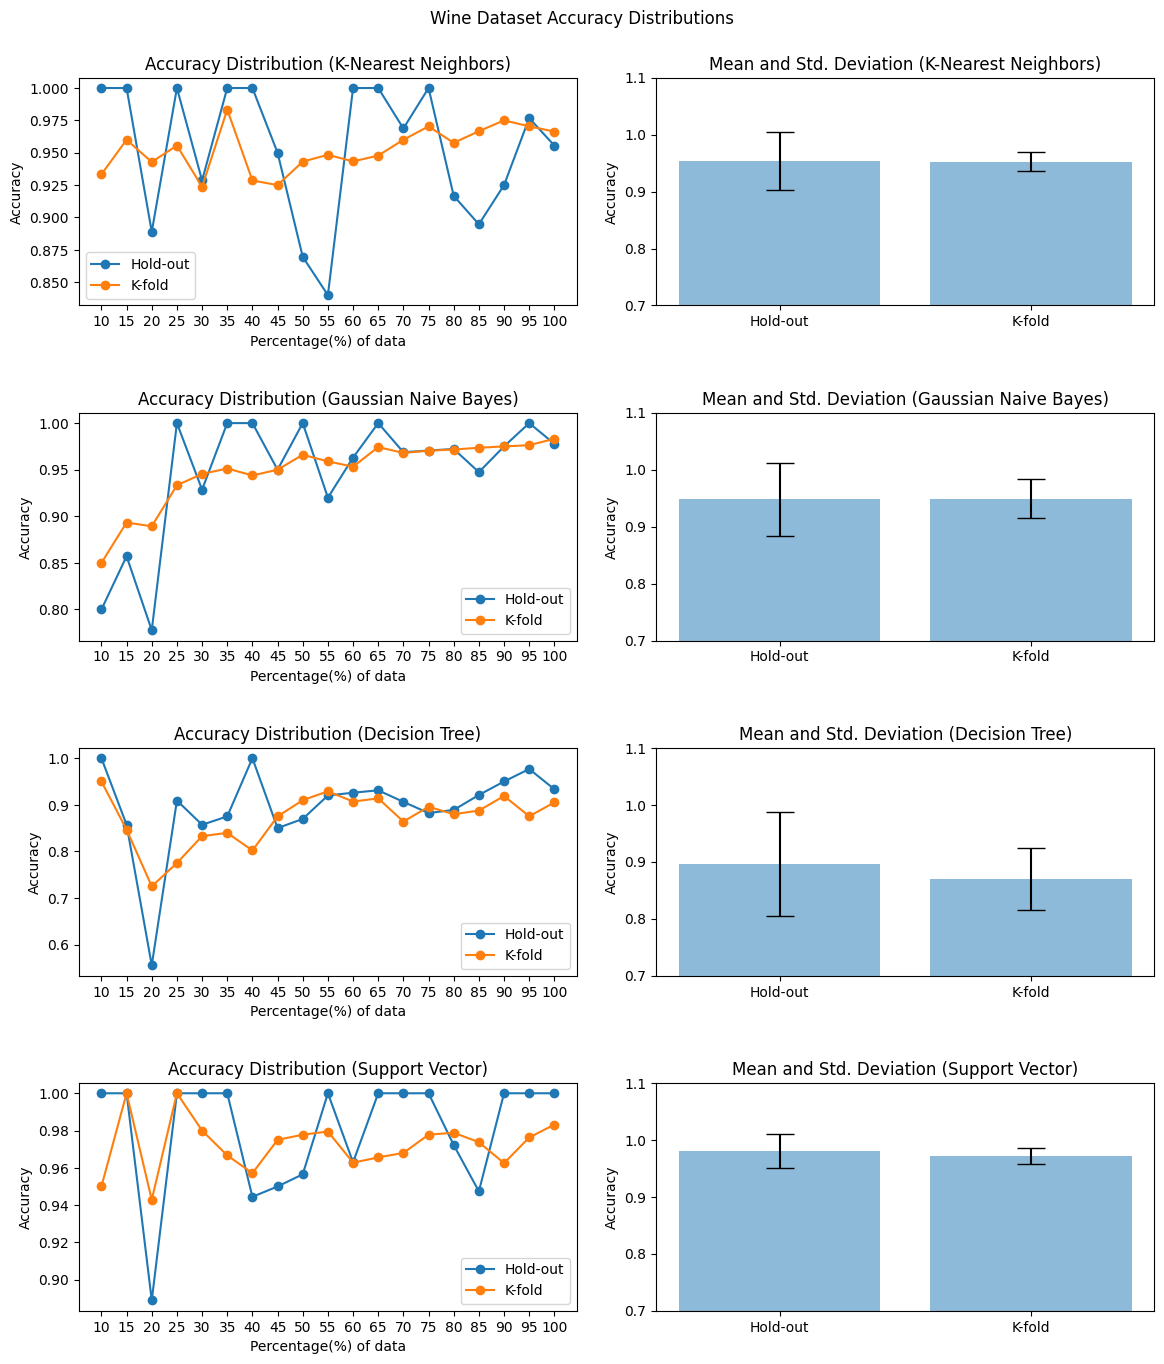

In [44]:
# plot hold-out vs. k-fold scores
models = ['knn', 'naive', 'dt', 'svc']
fig, axs = plt.subplots(4, 2, figsize=(12, 14))
fig.suptitle('Wine Dataset Accuracy Distributions')
iterations = range(10, 105, 5)
for i, model in enumerate(models):
    axs[i, 0].plot(iterations,wine_h_out_scores_map[model],marker='o', label='Hold-out')
    axs[i, 0].plot(iterations,wine_k_fold_scores_map[model],marker='o', label='K-fold')  
    axs[i, 0].set_title(f'Accuracy Distribution ({CLF_NAME_MAP[model]})')
    axs[i, 0].set_ylabel('Accuracy')
    axs[i, 0].set_xlabel("Percentage(%) of data")
    axs[i, 0].set_xticks(range(10, 105, 5))
    axs[i, 0].legend()
    

    # box plot mean and standard deviation for hold-out and k-fold
    hold_out_mean = np.mean(wine_h_out_scores_map[model])
    hold_out_std = np.std(wine_h_out_scores_map[model])
    k_fold_mean = np.mean(wine_k_fold_scores_map[model])
    k_fold_std = np.std(wine_k_fold_scores_map[model])
    axs[i, 1].bar(['Hold-out', 'K-fold'], [hold_out_mean, k_fold_mean], yerr=[hold_out_std, k_fold_std], align='center',  alpha=0.5, ecolor='black', capsize=10)
    axs[i, 1].set_title(f'Mean and Std. Deviation ({CLF_NAME_MAP[model]})')
    axs[i, 1].set_ylabel('Accuracy')
    axs[i, 1].set_ylim(0.7,1.1)

plt.tight_layout(pad=2, h_pad=3)
plt.show()

### Part II (Seeds Dataset)

####  Preliminary Data Handling and Analysis

In [30]:
# Load the dataset
seeds_data = pd.read_csv('data/seeds.csv' )

# Drop ID row
seeds_data.pop("ID")

# View the updated dataframe
print(seeds_data.head())

# Check for missing values
print("Missing records: ", seeds_data.isnull().sum())

# Check for duplicate records
print("Duplicate records: ", seeds_data.duplicated().any())
print("\n")

print("The total number of null records in the dataset is:")
print(seeds_data.isna().sum())
print("\n")



    area  perimeter  compactness  lengthOfKernel  widthOfKernel  \
0  15.26      14.84       0.8710           5.763          3.312   
1  14.88      14.57       0.8811           5.554          3.333   
2  14.29      14.09       0.9050           5.291          3.337   
3  13.84      13.94       0.8955           5.324          3.379   
4  16.14      14.99       0.9034           5.658          3.562   

   asymmetryCoefficient  lengthOfKernelGroove  seedType  
0                 2.221                 5.220         1  
1                 1.018                 4.956         1  
2                 2.699                 4.825         1  
3                 2.259                 4.805         1  
4                 1.355                 5.175         1  
Missing records:  area                    0
perimeter               0
compactness             0
lengthOfKernel          0
widthOfKernel           0
asymmetryCoefficient    0
lengthOfKernelGroove    0
seedType                0
dtype: int64
Duplicate 

#### Preparatory Data Analysis

#### Feature Analysis Visualization
A histogram plots with normal distribution curves are useful to visualize the distribution of each feature in the dataset. It aids the identification of potential outliers or skewness in the data and more importantly it informs our decision whether to normalize or not. 

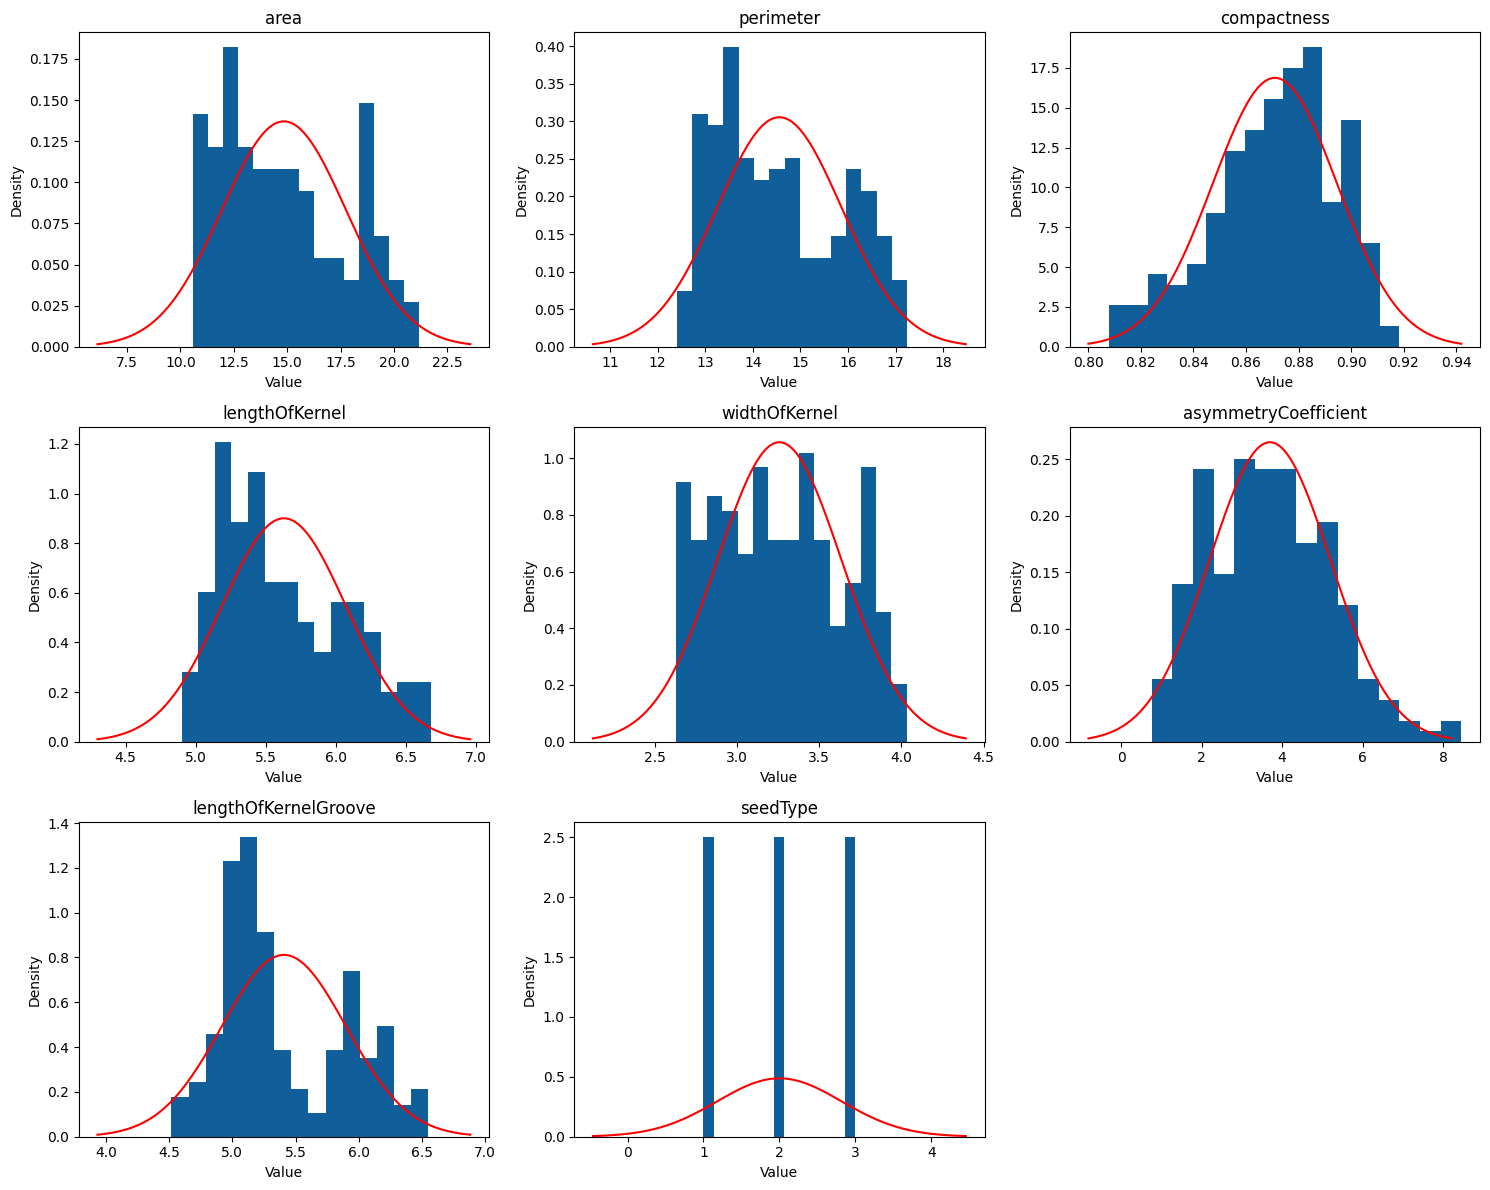

In [31]:
# 3x3 grid of subplots 
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Loop through each column in the dataset
for i, column in enumerate(seeds_data.columns):
    
    # Get the current axis object for this subplot
    ax = axes[i//3, i%3]

    # Histogram of the current column's value
    # Set the density argument to True to normalize the histogram
    ax.hist(seeds_data[column], bins=15, color='#115f9a', density=True) 
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    
    # Calculate the mean and standard deviation of the current column's values
    mu, sigma = seeds_data[column].mean(), seeds_data[column].std()
    
    # Generate 100 equally spaced values between 3 standard deviations below and above the mean
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    
    # Plot the normal distribution curve using the calculated mean and standard deviation
    ax.plot(x, stats.norm.pdf(x, mu, sigma), color='red')
    
# Remove the excess plots
for j in range(8, 9):
    axes.flatten()[j].axis('off')    

# Set the plot layout
plt.tight_layout()
plt.show()


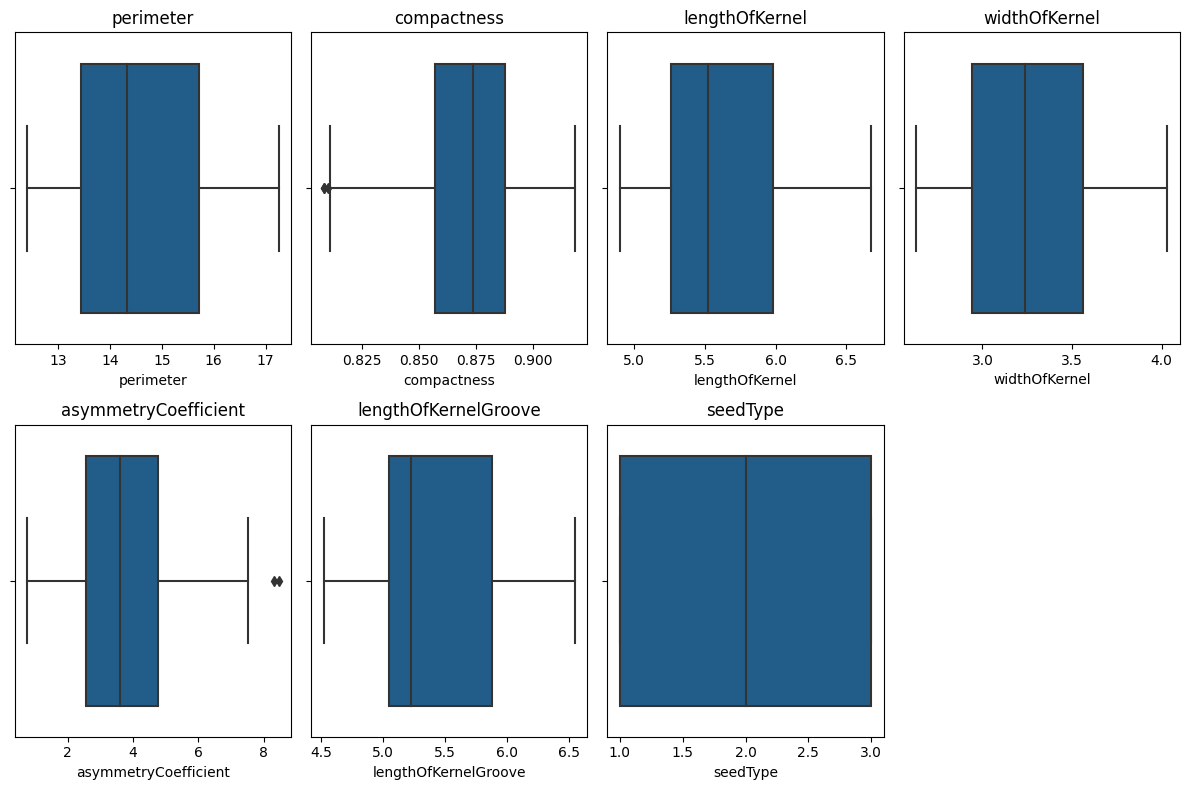

In [64]:
# 4x4 grid of subplots
fig, axs = plt.subplots(2, 4, figsize=(12, 8))

#Loop through each feature and plot a boxplot in a subplot
for i, feature in enumerate(seeds_data.columns[1:]):
    row = i // 4
    col = i % 4
    sns.boxplot(x=feature, data=seeds_data, ax=axs[row, col], color='#115f9a')
    axs[row, col].set_title(feature)

#Remove unused subplots
for j in range(i+1, 4*2):
    axs.flatten()[j].axis('off')

plt.tight_layout()
plt.show()


In [65]:
# Loop through the independent features
for feature in seeds_data.columns[1:]:
    # Get the minimum and maximum values for the current feature
    min_val = seeds_data[feature].min()
    max_val = seeds_data[feature].max()
    # Calculate the range for the current feature
    feature_range = max_val - min_val
    # Print the minimum, maximum, and range for the current feature
    print(f"{feature}: min = {min_val}, max = {max_val}, range = {feature_range}")

perimeter: min = 12.41, max = 17.25, range = 4.84
compactness: min = 0.8081, max = 0.9183, range = 0.11019999999999996
lengthOfKernel: min = 4.899, max = 6.675, range = 1.7759999999999998
widthOfKernel: min = 2.63, max = 4.033, range = 1.4030000000000005
asymmetryCoefficient: min = 0.7651, max = 8.456, range = 7.690899999999999
lengthOfKernelGroove: min = 4.519, max = 6.55, range = 2.0309999999999997
seedType: min = 1, max = 3, range = 2


#### Data Sampling
To enable our data distribution, we create 20 sample sizes of 5% increasing data of our data to analyse the effect of increasing data volume on accuracy

In [63]:
# Seeds Data subsets

seeds_data_subsets:dict[int, pd.DataFrame] = {}

# Save the 10 subsets of the shuffled dataset to a list
for i in range(10, 105, 5):

    # Use the sample method to select increments of 10% of the overall data
    seeds_data_shuff = seeds_data.sample(frac=i/100, random_state=15).reset_index(drop=True)

    # save the samples to a data frame by percentage 
    seeds_data_subsets[int(i)] = pd.DataFrame(seeds_data_shuff) 


#### Hold-Out Validation and K-Fold Cross Validation (KNN, GaussianNB, DTC, SVC)
Same as Part I

In [66]:

seeds_h_out_scores_map = {
    'knn': [],
    'naive': [],
    'dt': [],
    'svc':[]
}

seeds_k_fold_scores_map = {
    'knn': [],
    'naive': [],
    'dt': [],
    'svc':[]
}

# Iterate through 10 subsets of the seeds dataset
for i in range(10, 105, 5):

    # Data Frame for current iterations
    seeds_df = deepcopy(seeds_data_subsets[int(i)])

    y = seeds_df.pop('seedType').values   #target class
    X = seeds_df.values 

    #  Hold-Out Validation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=15)

    for key, clf in CLF_MAP.items():

        pipe = Pipeline([('scaler', StandardScaler()), (key, clf)])
        # The pipeline can be used as any other estimator and avoids leaking the test set into the train set
        pipe.fit(X_train, y_train)
        hold_accuracy = pipe.score(X_test, y_test)
        seeds_h_out_scores_map[key].append(hold_accuracy)

        # Perform 5-fold cross-validation
        k_fold_scores = cross_val_score(pipe, X, y, cv=5)
        seeds_k_fold_scores_map[key].append(np.mean(k_fold_scores))
   

pp = PrettyPrinter(width=160, compact=True)

print('Accuracy Scores for Hold-Out: ')
pp.pprint(seeds_h_out_scores_map)
print('Accuracy Scores for K-Fold: ')
pp.pprint(seeds_k_fold_scores_map)

Accuracy Scores for Hold-Out: 
{'dt': [0.6666666666666666, 0.875, 0.7272727272727273, 0.9230769230769231, 1.0, 1.0, 0.9047619047619048, 0.9166666666666666, 0.8518518518518519,
        0.9655172413793104, 0.96875, 0.9117647058823529, 0.8918918918918919, 0.925, 0.9047619047619048, 0.8444444444444444, 0.9375, 0.92, 0.9056603773584906],
 'knn': [0.8333333333333334, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9166666666666666, 0.8888888888888888, 1.0, 0.9375, 0.9117647058823529, 0.8918918918918919, 0.875,
         0.9047619047619048, 0.8888888888888888, 0.9375, 0.92, 0.9245283018867925],
 'naive': [0.8333333333333334, 1.0, 0.9090909090909091, 1.0, 0.9375, 0.9473684210526315, 0.9523809523809523, 0.9166666666666666, 0.8518518518518519,
           0.896551724137931, 0.875, 0.8823529411764706, 0.8648648648648649, 0.9, 0.8809523809523809, 0.8666666666666667, 0.8958333333333334, 0.92,
           0.8867924528301887],
 'svc': [0.8333333333333334, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9166666666666666, 1.0, 1.0, 0.93

#### Statistical Results
Same as Part I


In [41]:
# Define a function to calculate standard deviation and coefficient of variation
def calc_stats(scores):
    std = np.std(scores)
    cv = std / np.mean(scores)
    return std, cv


# Calculate and Print the Standard Deviation for k-fold results
for key, clf in CLF_NAME_MAP.items():
    std_hold_out, cv_hold_out = calc_stats(seeds_h_out_scores_map[key])
    print(f"\n{clf} Hold-Out Standard Deviation: ", std_hold_out)
    print(f"{clf} Hold-Out Coefficient of Variation: ", f"{(cv_hold_out*100):.2f}%")
    std_fold, cv_fold = calc_stats(seeds_k_fold_scores_map[key])
    print(f"\n{clf} K-Fold Standard Deviation: ", std_fold)
    print(f"{clf} k-fold Coefficient of Variation: " , f"{(cv_fold*100):.2f}%")
    



K-Nearest Neighbors Hold-Out Standard Deviation:  0.05207889984845409
K-Nearest Neighbors Hold-Out Coefficient of Variation:  5.55%

K-Nearest Neighbors K-Fold Standard Deviation:  0.017308170479920185
K-Nearest Neighbors k-fold Coefficient of Variation:  1.83%

Gaussian Naive Bayes Hold-Out Standard Deviation:  0.04415426528575027
Gaussian Naive Bayes Hold-Out Coefficient of Variation:  4.87%

Gaussian Naive Bayes K-Fold Standard Deviation:  0.021616862970888478
Gaussian Naive Bayes k-fold Coefficient of Variation:  2.38%

Decision Tree Hold-Out Standard Deviation:  0.09239441130198642
Decision Tree Hold-Out Coefficient of Variation:  10.36%

Decision Tree K-Fold Standard Deviation:  0.0592802112633135
Decision Tree k-fold Coefficient of Variation:  6.68%

Support Vector Hold-Out Standard Deviation:  0.052564653685291146
Support Vector Hold-Out Coefficient of Variation:  5.56%

Support Vector K-Fold Standard Deviation:  0.02449608714221514
Support Vector k-fold Coefficient of Variati

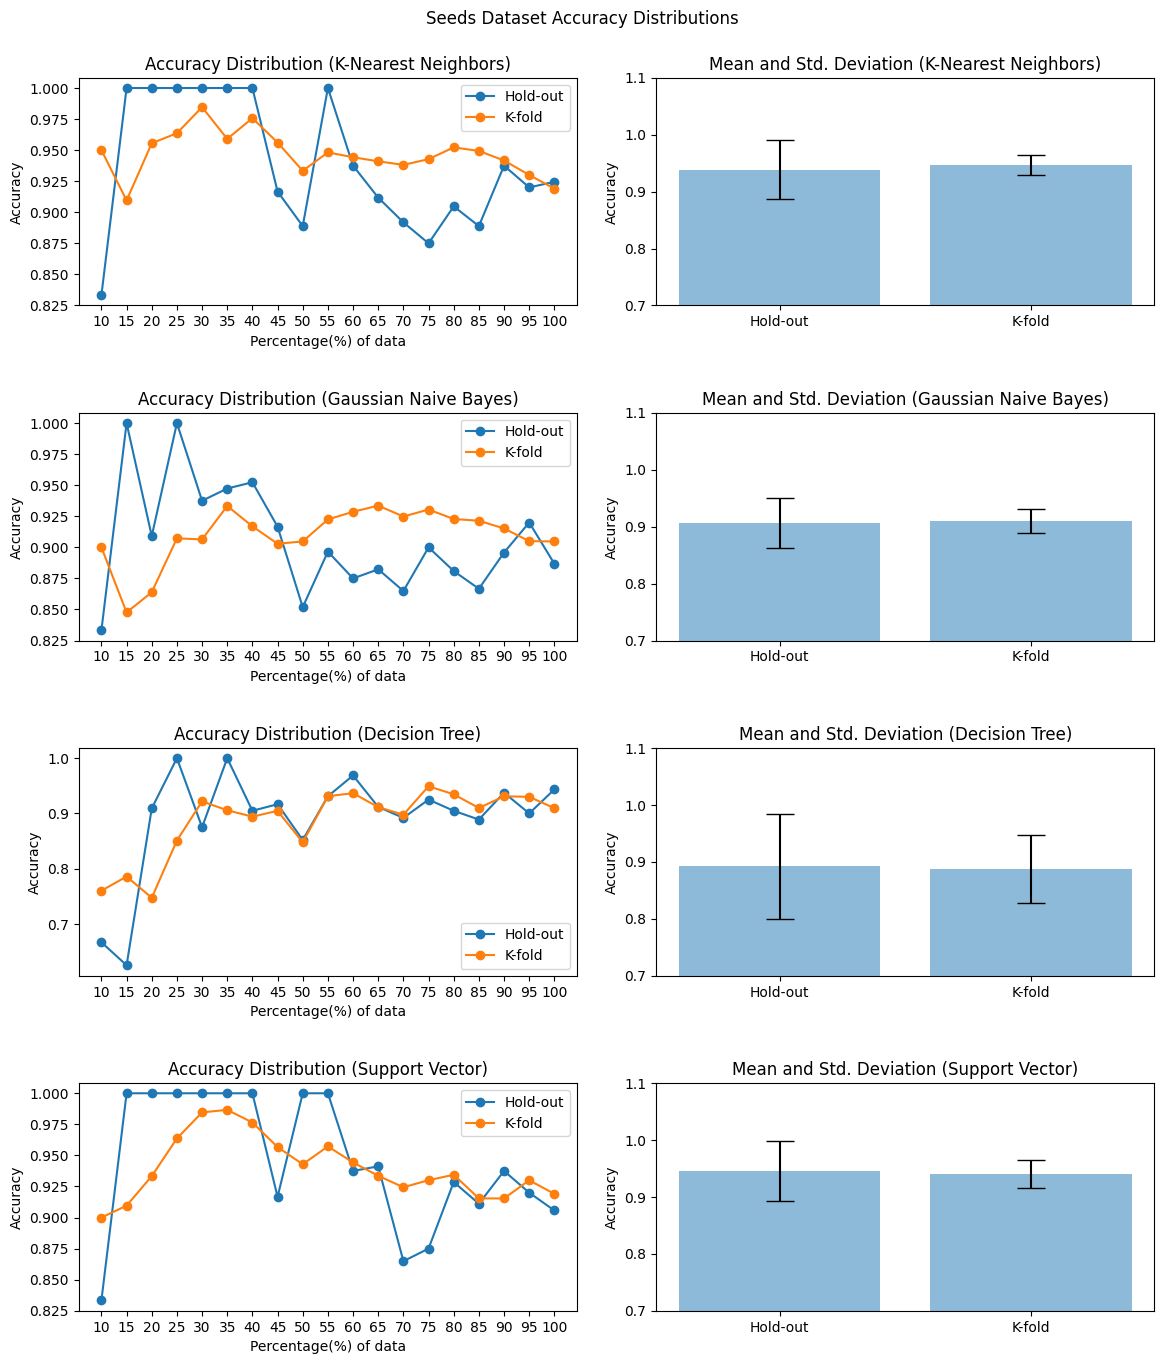

In [43]:
# plot hold-out vs. k-fold scores
models = ['knn', 'naive', 'dt', 'svc']
fig, axs = plt.subplots(4, 2, figsize=(12, 14))
fig.suptitle('Seeds Dataset Accuracy Distributions')
iterations = range(10, 105, 5)
for i, model in enumerate(models):
    axs[i, 0].plot(iterations,seeds_h_out_scores_map[model],marker='o', label='Hold-out')
    axs[i, 0].plot(iterations,seeds_k_fold_scores_map[model],marker='o', label='K-fold')  
    axs[i, 0].set_title(f'Accuracy Distribution ({CLF_NAME_MAP[model]})')
    axs[i, 0].set_ylabel('Accuracy')
    axs[i, 0].set_xlabel("Percentage(%) of data")
    axs[i, 0].set_xticks(range(10, 105, 5))
    axs[i, 0].legend()
    

    # box plot mean and standard deviation for hold-out and k-fold
    hold_out_mean = np.mean(seeds_h_out_scores_map[model])
    hold_out_std = np.std(seeds_h_out_scores_map[model])
    k_fold_mean = np.mean(seeds_k_fold_scores_map[model])
    k_fold_std = np.std(seeds_k_fold_scores_map[model])
    axs[i, 1].bar(['Hold-out', 'K-fold'], [hold_out_mean, k_fold_mean], yerr=[hold_out_std, k_fold_std], align='center',  alpha=0.5, ecolor='black', capsize=10)
    axs[i, 1].set_title(f'Mean and Std. Deviation ({CLF_NAME_MAP[model]})')
    axs[i, 1].set_ylabel('Accuracy')
    axs[i, 1].set_ylim(0.7,1.1)

plt.tight_layout(pad=2, h_pad=3)
plt.show()

### Part III (Ionosphere Dataset)

####  Preliminary Data Handling and Analysis

In [67]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data"

# Load the dataset
iono_data = pd.read_csv(url, names=['col_a', 'col_b', 'col_c', 'col_d', 'col_e', 'col_f', 'col_g', 'col_h', 'col_i', 'col_j', 'col_k', 'col_l', 'col_m', 
                                              'col_n', 'col_o', 'col_p', 'col_q', 'col_r', 'col_s', 'col_t', 'col_u', 'col_v', 'col_w', 'col_x', 'col_y', 'col_z',
                                              'col_aa','col_ab' , 'col_ac','col_ad','col_ae','col_af','col_ag','col_ah','class'])

# View the updated dataframe
print(iono_data.head())

# Check for missing values
print("Missing records: ", iono_data.isnull().sum())

# Check for duplicate records
print("Duplicate records: ", iono_data.duplicated().any())
print("\n")

print("The total number of null records in the dataset is:")
print(iono_data.isna().sum())
print("\n")



   col_a  col_b    col_c    col_d    col_e    col_f    col_g    col_h  \
0      1      0  0.99539 -0.05889  0.85243  0.02306  0.83398 -0.37708   
1      1      0  1.00000 -0.18829  0.93035 -0.36156 -0.10868 -0.93597   
2      1      0  1.00000 -0.03365  1.00000  0.00485  1.00000 -0.12062   
3      1      0  1.00000 -0.45161  1.00000  1.00000  0.71216 -1.00000   
4      1      0  1.00000 -0.02401  0.94140  0.06531  0.92106 -0.23255   

     col_i    col_j  ...    col_z   col_aa   col_ab   col_ac   col_ad  \
0  1.00000  0.03760  ... -0.51171  0.41078 -0.46168  0.21266 -0.34090   
1  1.00000 -0.04549  ... -0.26569 -0.20468 -0.18401 -0.19040 -0.11593   
2  0.88965  0.01198  ... -0.40220  0.58984 -0.22145  0.43100 -0.17365   
3  0.00000  0.00000  ...  0.90695  0.51613  1.00000  1.00000 -0.20099   
4  0.77152 -0.16399  ... -0.65158  0.13290 -0.53206  0.02431 -0.62197   

    col_ae   col_af   col_ag   col_ah  class  
0  0.42267 -0.54487  0.18641 -0.45300      g  
1 -0.16626 -0.06288 -0.13738

#### Preparatory Data Analysis

#### Feature Analysis Visualization
A histogram plots with normal distribution curves are useful to visualize the distribution of each feature in the dataset. It aids the identification of potential outliers or skewness in the data and more importantly it informs our decision whether to normalize or not. 

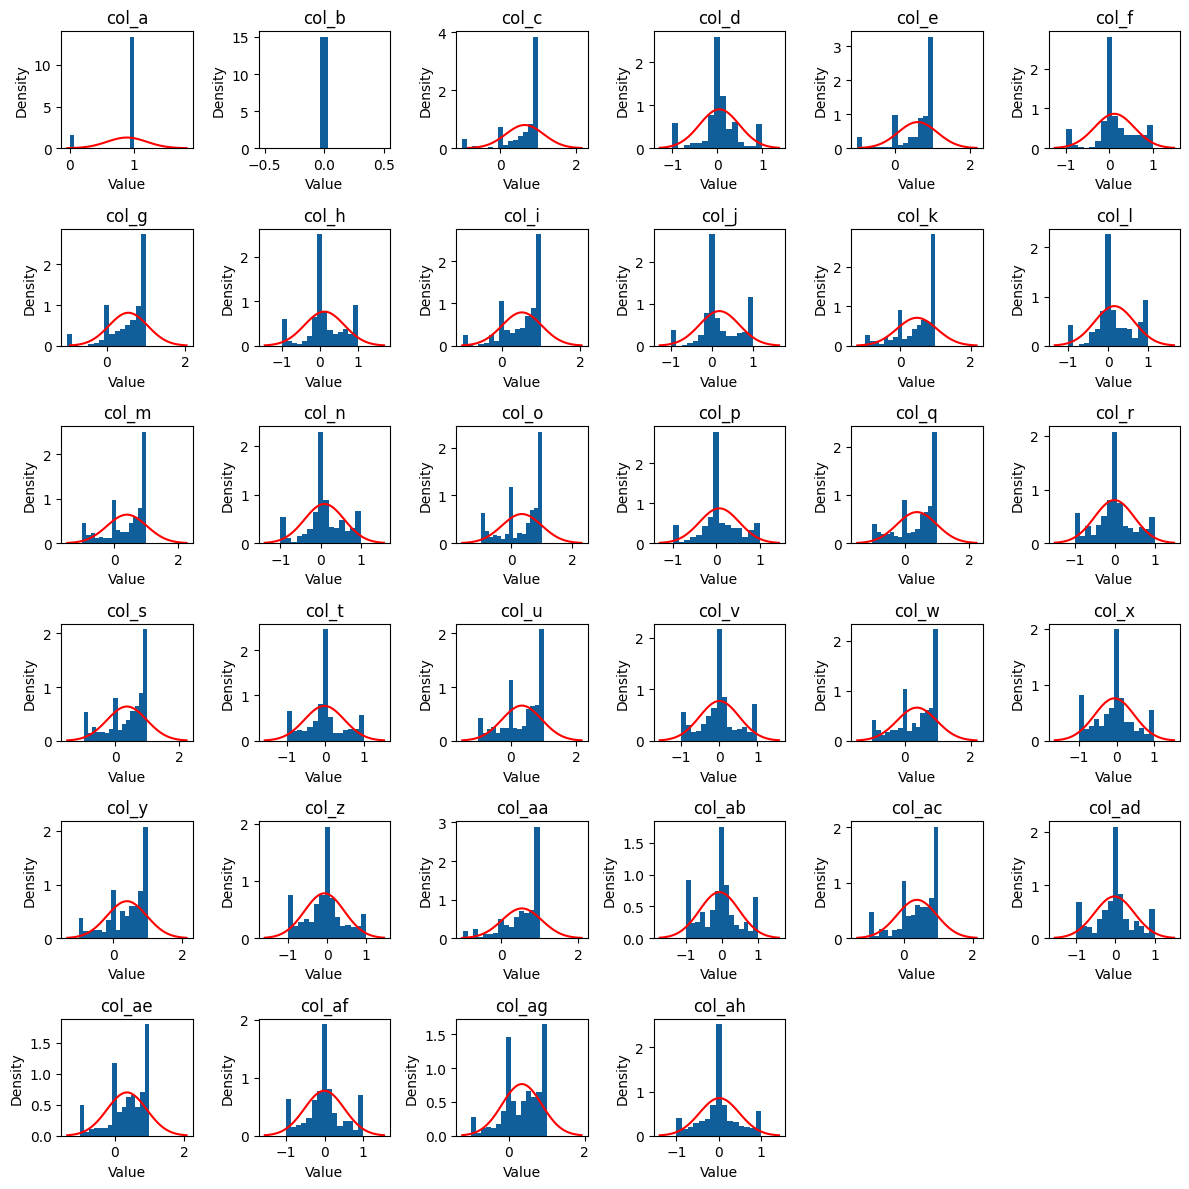

In [20]:
# 6x6 grid of subplots 
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(12, 12))

# Loop through each column in the dataset
for i, column in enumerate(wine_data.columns):
    
    if column == 'class':
        continue
    
    # Get the current axis object for this subplot
    ax = axes[i//6, i%6]

    # Histogram of the current column's value
    # Set the density argument to True to normalize the histogram
    ax.hist(iono_data[column], bins=15, color='#115f9a', density=True) 
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    
    # Calculate the mean and standard deviation of the current column's values
    mu, sigma = iono_data[column].mean(), iono_data[column].std()
    
    # Generate 100 equally spaced values between 3 standard deviations below and above the mean
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    
    # Plot the normal distribution curve using the calculated mean and standard deviation
    ax.plot(x, stats.norm.pdf(x, mu, sigma), color='red')
    
# Remove the excess plots
for j in range(i, 6*6):
    axes.flatten()[j].axis('off')    

# Set the plot layout
plt.tight_layout()
plt.show()


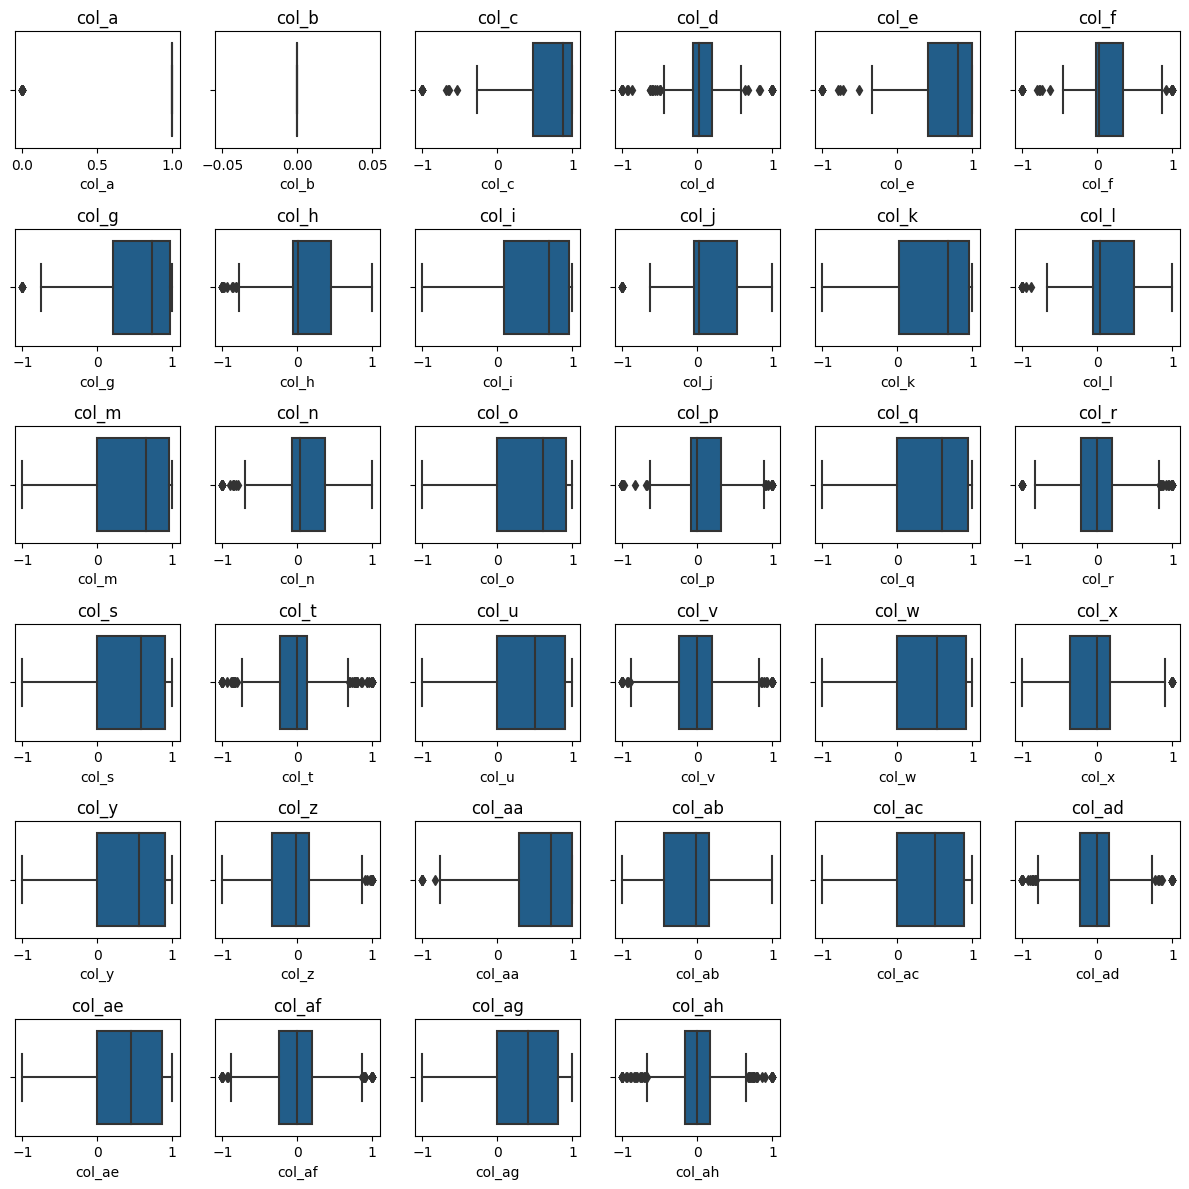

In [40]:
# 6x6 grid of subplots
fig, axs = plt.subplots(6, 6, figsize=(12, 12))

#Loop through each feature and plot a boxplot in a subplot
for i, feature in enumerate(iono_data.columns):
    if feature == 'class':
        continue
    row = i // 6
    col = i % 6
    sns.boxplot(x=feature, data=iono_data, ax=axs[row, col], color='#115f9a')
    axs[row, col].set_title(feature)

#Remove unused subplots
for j in range(i, 6*6):
    axs.flatten()[j].axis('off')

plt.tight_layout()
plt.show()


In [43]:
# Loop through the independent features
for feature in iono_data.columns[:-1]:
    # Get the minimum and maximum values for the current feature
    min_val = iono_data[feature].min()
    max_val = iono_data[feature].max()
    # Calculate the range for the current feature
    feature_range = max_val - min_val
    # Print the minimum, maximum, and range for the current feature
    print(f"{feature}: min = {min_val}, max = {max_val}, range = {feature_range}")

col_a: min = 0, max = 1, range = 1
col_c: min = -1.0, max = 1.0, range = 2.0
col_d: min = -1.0, max = 1.0, range = 2.0
col_e: min = -1.0, max = 1.0, range = 2.0
col_f: min = -1.0, max = 1.0, range = 2.0
col_g: min = -1.0, max = 1.0, range = 2.0
col_h: min = -1.0, max = 1.0, range = 2.0
col_i: min = -1.0, max = 1.0, range = 2.0
col_j: min = -1.0, max = 1.0, range = 2.0
col_k: min = -1.0, max = 1.0, range = 2.0
col_l: min = -1.0, max = 1.0, range = 2.0
col_m: min = -1.0, max = 1.0, range = 2.0
col_n: min = -1.0, max = 1.0, range = 2.0
col_o: min = -1.0, max = 1.0, range = 2.0
col_p: min = -1.0, max = 1.0, range = 2.0
col_q: min = -1.0, max = 1.0, range = 2.0
col_r: min = -1.0, max = 1.0, range = 2.0
col_s: min = -1.0, max = 1.0, range = 2.0
col_t: min = -1.0, max = 1.0, range = 2.0
col_u: min = -1.0, max = 1.0, range = 2.0
col_v: min = -1.0, max = 1.0, range = 2.0
col_w: min = -1.0, max = 1.0, range = 2.0
col_x: min = -1.0, max = 1.0, range = 2.0
col_y: min = -1.0, max = 1.0, range = 2.0

In [45]:
# Remove Useless Feature with no variance or range
col_b = iono_data.drop(columns=['col_b'], inplace=True)


# Extract the target variable ('class' column)
target = iono_data['class']

# Encode the target variable using LabelEncoder
le = LabelEncoder()
iono_data['class'] = le.fit_transform(target)



iono_data.head()




,col_a,col_c,col_d,col_e,col_f,col_g,col_h,col_i,col_j,col_k,...,col_z,col_aa,col_ab,col_ac,col_ad,col_ae,col_af,col_ag,col_ah,class
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1


#### Data Sampling
To enable our data distribution, we create 20 sample sizes of 5% increasing data of our data to analyse the effect of increasing data volume on accuracy

In [47]:
# Data subsets object (keys are the sample size percentages 5, 10, 15..)

iono_data_subsets:dict[int, pd.DataFrame] = {}

# Save the 10 subsets of the shuffled dataset to a list
for i in range(10, 105, 5):

    # Use the sample method to select increments of 10% of the overall data
    iono_data_shuff = iono_data.sample(frac=i/100, random_state=15).reset_index(drop=True)

    # save the samples to a data frame by percentage 
    iono_data_subsets[int(i)] = pd.DataFrame(iono_data_shuff) 


#### Hold-Out Validation and K-Fold Cross Validation (KNN, GaussianNB, DTC, SVC)
The following code is using four different machine learning algorithms to create models for comparing the two different methods of splitting the data into training and testing sets to see which method gives more stable results.
* First we use hold-out validation, where the dataset is randomly split into a training set (75%) and a testing set (25%). The machine learning algorithm is trained on the training set, and then tested on the testing set. This process is repeated for each iteration.
* Then we k-fold cross-validation,  in this method, the dataset is split into 5 k-folds, and each fold is used as the testing set while the other folds are used as the training set. This process is repeated k=5 times, so that each part is used as the testing set once. Again, this process is repeated several times to get an average accuracy score.
* We then create a dictionary that maps the names of the machine learning algorithms to the algorithms themselves and then two more dictionaries to store the accuracy scores for the hold-out validation and k-fold cross-validation methods.
* We then iterate over 20 different subsets of the wine dataset, increasing the size of the subsets by 5% each time. For each subset, it separates the dataset into the target class (quality) and the features (such as alcohol content). It then uses each of the four machine learning algorithms to make predictions about the quality of the wine using both hold-out validation and k-fold cross-validation. It stores the accuracy scores for each method in the respective dictionaries.
* Finally, the code prints out the accuracy scores for each of the four machine learning algorithms using both hold-out validation and k-fold cross-validation. This will allow us to compare the accuracy of the algorithms using both methods and determine which method is more accurate.

In [68]:

CLF_MAP = {
    'knn': KNeighborsClassifier(n_neighbors=3),
    'naive': GaussianNB(),
    'dt': DecisionTreeClassifier(),
    'svc': SVC()
}
CLF_NAME_MAP = {
    'knn': 'K-Nearest Neighbors',
    'naive': 'Gaussian Naive Bayes',
    'dt': 'Decision Tree',
    'svc': 'Support Vector'
}

iono_h_out_scores_map = {
    'knn': [],
    'naive': [],
    'dt': [],
    'svc':[]
}

iono_k_fold_scores_map = {
    'knn': [],
    'naive': [],
    'dt': [],
    'svc':[]
}

# Iterate through 10 subsets of the wine dataset
for i in range(10, 105, 5):

    # Data Frame for current iterations
    wine_df = deepcopy(iono_data_subsets[int(i)])

    y = wine_df.pop('class').values   #target class
    X = wine_df.values 

    #  Hold-Out Validation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=15)

    for key, clf in CLF_MAP.items():

        pipe = Pipeline([('scaler', StandardScaler()), (key, clf)])
        # The pipeline can be used as any other estimator
        # and avoids leaking the test set into the train set
        pipe.fit(X_train, y_train)
        hold_accuracy = pipe.score(X_test, y_test)
        iono_h_out_scores_map[key].append(hold_accuracy)

        # Perform 5-fold cross-validation
        k_fold_scores = cross_val_score(pipe, X, y, cv=5)
        iono_k_fold_scores_map[key].append(np.mean(k_fold_scores))
   

pp = PrettyPrinter(width=160, compact=True)

print('Accuracy Scores for Hold-Out: ')
pp.pprint(iono_h_out_scores_map)
print('Accuracy Scores for K-Fold: ')
pp.pprint(iono_k_fold_scores_map)

Accuracy Scores for Hold-Out: 
{'dt': [1.0, 0.8571428571428571, 0.8888888888888888, 0.8636363636363636, 0.7777777777777778, 0.8387096774193549, 0.8, 0.875, 0.8181818181818182,
        0.8571428571428571, 0.7358490566037735, 0.8245614035087719, 0.9032258064516129, 0.803030303030303, 0.8873239436619719, 0.8933333333333333,
        0.8481012658227848, 0.8095238095238095, 0.875],
 'knn': [1.0, 0.9285714285714286, 0.6666666666666666, 0.7272727272727273, 0.7037037037037037, 0.7741935483870968, 0.8285714285714286, 0.75, 0.8181818181818182,
         0.7755102040816326, 0.7358490566037735, 0.7719298245614035, 0.7741935483870968, 0.8333333333333334, 0.8732394366197183, 0.8133333333333334,
         0.8481012658227848, 0.8928571428571429, 0.7954545454545454],
 'naive': [0.8888888888888888, 0.9285714285714286, 0.8333333333333334, 0.6818181818181818, 0.7777777777777778, 0.7419354838709677, 0.8571428571428571, 0.875,
           0.8863636363636364, 0.8775510204081632, 0.8679245283018868, 0.85964912280

#### Statistical Results
The standard deviation and coefficient of variation provide information about the variability and consistency of the accuracy scores, respectively, for each classifier and validation method
The following defines a function to calculate the standard deviation and coefficient of variation of a set of scores. Then it loops through a dictionary of classifiers and their names, and calculates and prints the standard deviation and coefficient of variation of the hold-out and k-fold scores for each classifier. The hold-out scores were obtained by splitting the data into training and testing sets, fitting the pipeline (which includes data scaling and the classifier), and computing the accuracy score on the testing set. The k-fold scores were obtained by performing 5-fold cross-validation on the entire dataset using the same pipeline and classifier. 


In [50]:
# Define a function to calculate standard deviation and coefficient of variation
def calc_stats(scores):
    std = np.std(scores)
    cv = std / np.mean(scores)
    return std, cv


# Calculate and Print the Standard Deviation for k-fold results
for key, clf in CLF_NAME_MAP.items():
    std_hold_out, cv_hold_out = calc_stats(iono_h_out_scores_map[key])
    print(f"\n{clf} Hold-Out Standard Deviation: ", std_hold_out)
    print(f"{clf} Hold-Out Coefficient of Variation: ", f"{(cv_hold_out*100):.2f}%")
    std_fold, cv_fold = calc_stats(iono_k_fold_scores_map[key])
    print(f"\n{clf} K-Fold Standard Deviation: ", std_fold)
    print(f"{clf} k-fold Coefficient of Variation: " , f"{(cv_fold*100):.2f}%")
    



K-Nearest Neighbors Hold-Out Standard Deviation:  0.07824193468313126
K-Nearest Neighbors Hold-Out Coefficient of Variation:  9.71%

K-Nearest Neighbors K-Fold Standard Deviation:  0.020146581635716178
K-Nearest Neighbors k-fold Coefficient of Variation:  2.42%

Gaussian Naive Bayes Hold-Out Standard Deviation:  0.05993709725512337
Gaussian Naive Bayes Hold-Out Coefficient of Variation:  7.01%

Gaussian Naive Bayes K-Fold Standard Deviation:  0.033701001790942035
Gaussian Naive Bayes k-fold Coefficient of Variation:  3.90%

Decision Tree Hold-Out Standard Deviation:  0.06309131676270487
Decision Tree Hold-Out Coefficient of Variation:  7.38%

Decision Tree K-Fold Standard Deviation:  0.045955382988871044
Decision Tree k-fold Coefficient of Variation:  5.23%

Support Vector Hold-Out Standard Deviation:  0.046091089886438674
Support Vector Hold-Out Coefficient of Variation:  5.03%

Support Vector K-Fold Standard Deviation:  0.02368539353689778
Support Vector k-fold Coefficient of Variat

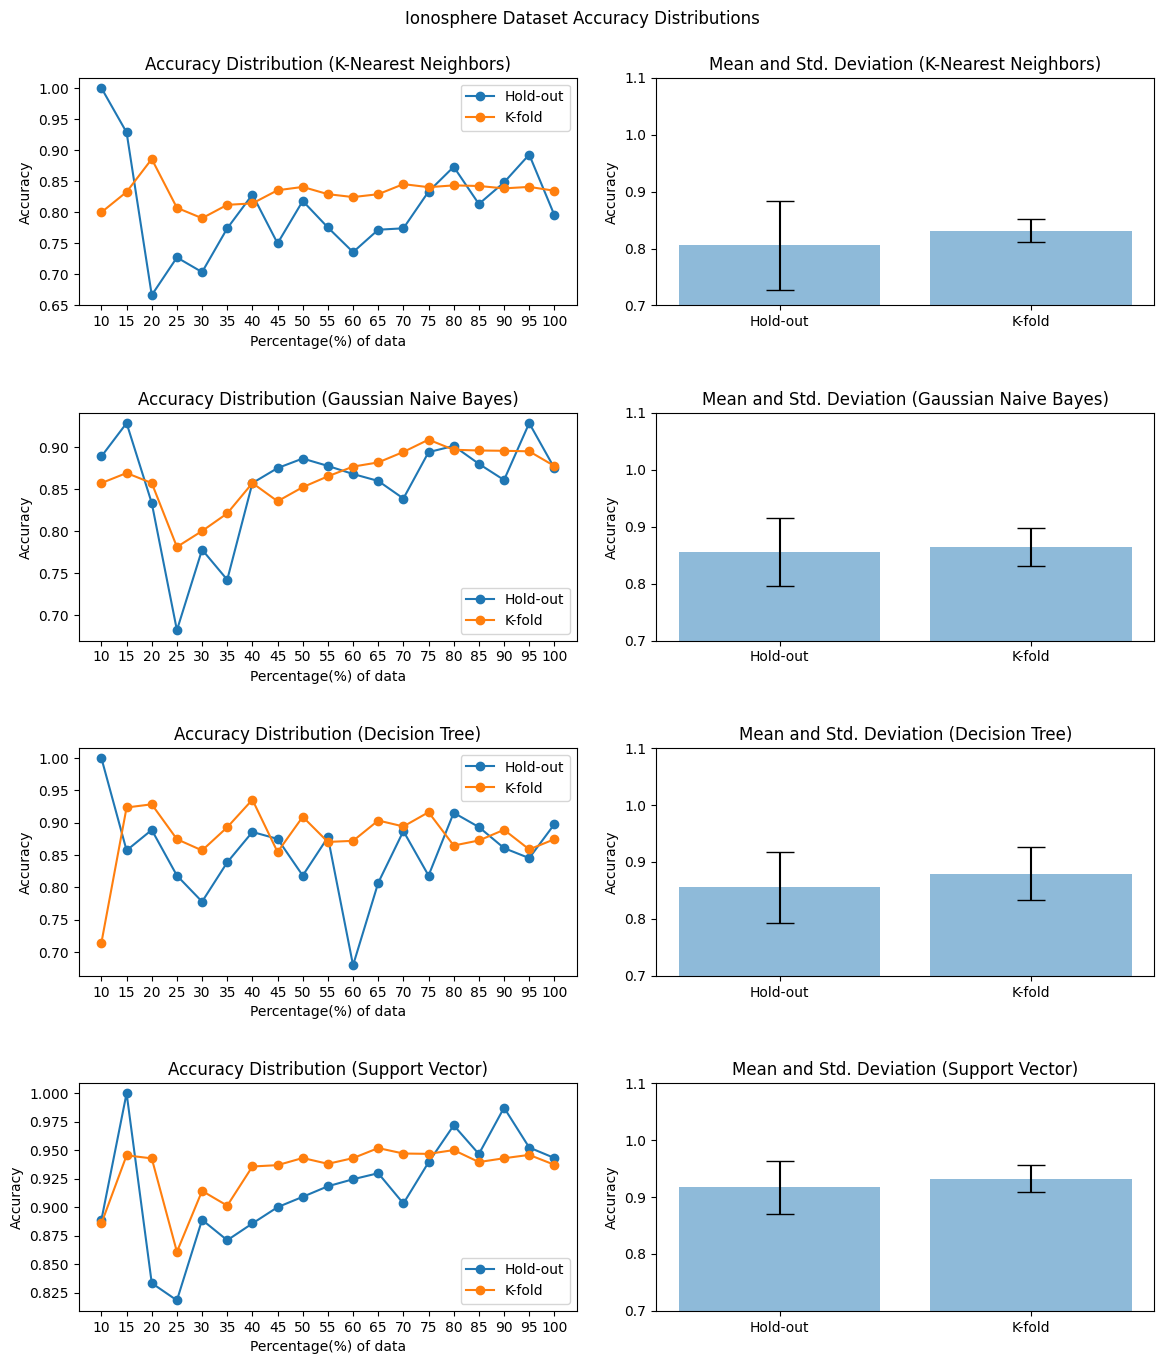

In [51]:
# plot hold-out vs. k-fold scores
models = ['knn', 'naive', 'dt', 'svc']
fig, axs = plt.subplots(4, 2, figsize=(12, 14))
fig.suptitle('Ionosphere Dataset Accuracy Distributions')
iterations = range(10, 105, 5)
for i, model in enumerate(models):
    axs[i, 0].plot(iterations,iono_h_out_scores_map[model],marker='o', label='Hold-out')
    axs[i, 0].plot(iterations,iono_k_fold_scores_map[model],marker='o', label='K-fold')  
    axs[i, 0].set_title(f'Accuracy Distribution ({CLF_NAME_MAP[model]})')
    axs[i, 0].set_ylabel('Accuracy')
    axs[i, 0].set_xlabel("Percentage(%) of data")
    axs[i, 0].set_xticks(range(10, 105, 5))
    axs[i, 0].legend()
    

    # box plot mean and standard deviation for hold-out and k-fold
    hold_out_mean = np.mean(iono_h_out_scores_map[model])
    hold_out_std = np.std(iono_h_out_scores_map[model])
    k_fold_mean = np.mean(iono_k_fold_scores_map[model])
    k_fold_std = np.std(iono_k_fold_scores_map[model])
    axs[i, 1].bar(['Hold-out', 'K-fold'], [hold_out_mean, k_fold_mean], yerr=[hold_out_std, k_fold_std], align='center',  alpha=0.5, ecolor='black', capsize=10)
    axs[i, 1].set_title(f'Mean and Std. Deviation ({CLF_NAME_MAP[model]})')
    axs[i, 1].set_ylabel('Accuracy')
    axs[i, 1].set_ylim(0.7,1.1)

plt.tight_layout(pad=2, h_pad=3)
plt.show()

## Findings and Conclusion
Overall, when comparing hold-out to k-fold cross validation, we can see a similar trend of accuracies for all classifiers and in all three datasets. 
* First, from our accuracy distributions we can notice that the accuracies where most unreliable when the amount of data was very small usually around (n<50).
* From the shape of the accuracy distribution lines we can also ascertain that in all classifiers and datasets hold-out validation resulted in more unpredictable and unstable predictions evident by its zig-zag nature showing sharp increases and decreases as the data subset changed while K-fold remained fairly stable at (n>50)  samples.
* Statistically speaking in all twelve model accuracy distributions K-fold had a lower standard deviation and coefficient of variation once again reasserting the notion that it provides a more stable prediction accuracy which further visualized by the smaller margin on the box plots. 